In [1]:
import os, tqdm
import pandas as pd
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import anndata as ad

from matplotlib import rc
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)

In [2]:
# data_location = 'local'
data_location = 'server'

if data_location=='server':
    folder = os.path.join("Y:",os.sep,"Nicola_Gritti","analysis_code","scRNAseq_Gastruloids","new_codes",'results','integration','diff_expr')
elif data_location=='hdd':
    folder = os.path.join("F:",os.sep,"scrnaseq_gastruloids",'results','integration','diff_expr')
elif data_location == 'local':
    folder = os.path.join('C:',os.sep,'Users','nicol','OneDrive','Desktop','scrnaseq_gastruloids','results','integration','diff_expr')


# Analysis of markers for every cell type/germ layer

This is intended to be a sup fig of the final submission

In [9]:
adata_pluri = ad.read_csv(os.path.join(folder,'expression_markersGenes_pluri.csv')).T
pluri_fate = pd.read_csv(os.path.join(folder,'expression_markersGenes_pluri_meta.csv'))
pluri_fate = pluri_fate.rename(columns={'celltype.general': 'celltype'})
pluri_fate = pluri_fate[['celltype']]
adata_pluri.obs = pluri_fate

adata_meso = ad.read_csv(os.path.join(folder,'expression_markersGenes_meso.csv')).T
meso_fate = pd.read_csv(os.path.join(folder,'expression_markersGenes_meso_meta.csv'))
meso_fate = meso_fate.rename(columns={'celltype.general': 'celltype'})
meso_fate = meso_fate[['celltype']]
adata_meso.obs = meso_fate

adata_endo = ad.read_csv(os.path.join(folder,'expression_markersGenes_endo.csv')).T
endo_fate = pd.read_csv(os.path.join(folder,'expression_markersGenes_endo_meta.csv'))
endo_fate = endo_fate.rename(columns={'celltype.general': 'celltype'})
endo_fate = endo_fate[['celltype']]
adata_endo.obs = endo_fate

adata_ecto = ad.read_csv(os.path.join(folder,'expression_markersGenes_ecto.csv')).T
ecto_fate = pd.read_csv(os.path.join(folder,'expression_markersGenes_ecto_meta.csv'))
ecto_fate = ecto_fate.rename(columns={'celltype.general': 'celltype'})
ecto_fate = ecto_fate[['celltype']]
adata_ecto.obs = ecto_fate

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,4,6,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'celltype' as categorical
c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


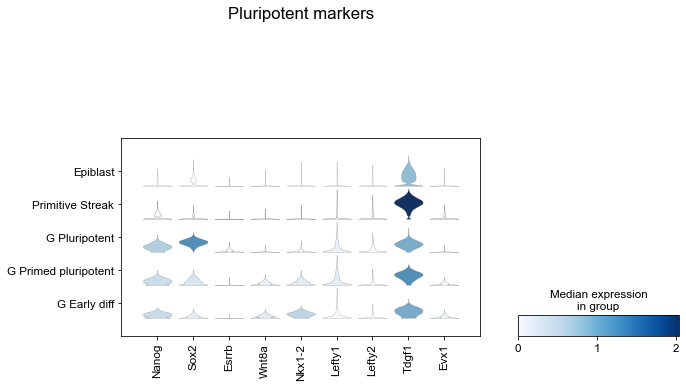

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_pluri, list(adata_pluri.var.index), groupby = 'celltype',
                    categories_order=['Epiblast', 'Primitive Streak', 'G Pluripotent', 'G Primed pluripotent', 'G Early diff'],
                    ax=ax,
                    title='Pluripotent markers')
fig.savefig(os.path.join(folder,'pluripotent_markers.pdf'))


... storing 'celltype' as categorical


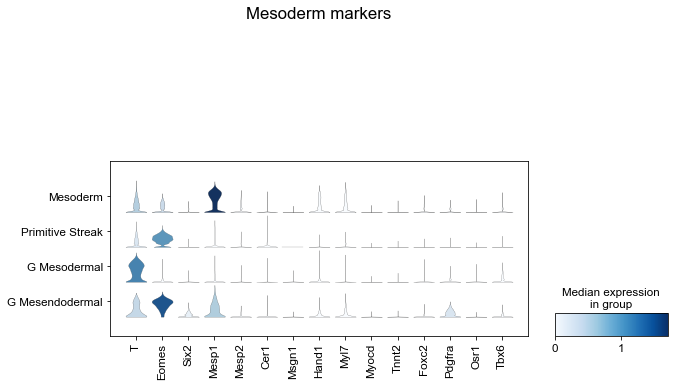

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_meso, list(adata_meso.var.index), groupby = 'celltype',
                    categories_order=['Mesoderm', 'Primitive Streak', 'G Mesodermal', 'G Mesendodermal'],
                    ax=ax,
                    title='Mesoderm markers')
fig.savefig(os.path.join(folder,'mesoderm_markers.pdf'))


... storing 'celltype' as categorical


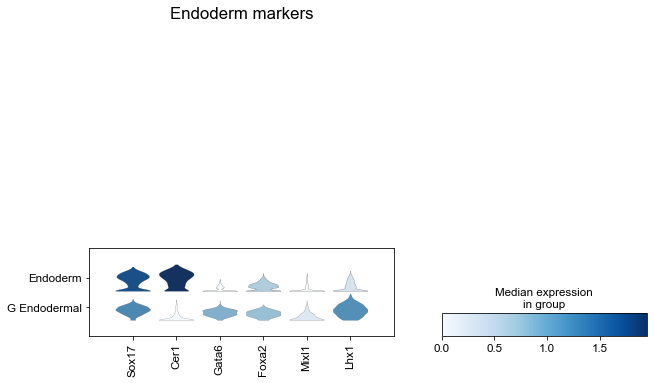

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_endo, list(adata_endo.var.index), groupby = 'celltype',
                    categories_order=['Endoderm', 'G Endodermal'],
                    ax=ax,
                    title='Endoderm markers')
fig.savefig(os.path.join(folder,'endoderm_markers.pdf'))


... storing 'celltype' as categorical


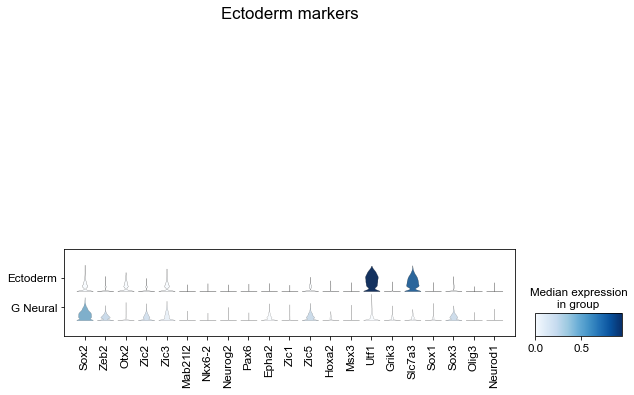

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_ecto, list(adata_ecto.var.index), groupby = 'celltype',
                    categories_order=['Ectoderm', 'G Neural'],
                    ax=ax,
                    title='Ectoderm markers')
fig.savefig(os.path.join(folder,'ectoderm_markers.pdf'))



# Correlation analysis

In [16]:
meta = pd.read_csv(os.path.join(folder,'expression_markersGenes_ALL_meta.csv'))
meta = meta.rename(columns={'celltype.pijuan':'celltype_pijuan',
                           'celltype.anlas':'celltype_anlas',
                           'celltype.general':'celltype',
                           'Unnamed: 0':'cellName'})
meta['stage_pijuan'] = meta.stage
meta['stage_anlas'] = meta['merge.ident']
meta = meta.drop(['cell','Phase','barcode','G2M.Score','old.ident','S.Score','cluster',
                  'seurat_clusters','orig.ident','stage','merge.ident','integrate.ident','integrated_snn_res.0.5',
                 'RNA_snn_res.0.5','CC.Difference','RNA_snn_res.0.7','nCount_integrated','nFeature_integrated','sample',
                 'percent.mt'], axis=1)
# meta.index = meta.cellName

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,4,6,12,14,19,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
adata = ad.read_csv(os.path.join(folder,'expression_markersGenes_ALL.csv')).T

adata.obs = meta

In [18]:
adata.obs

,cellName,celltype_pijuan,nCount_RNA,nFeature_RNA,batch.ident,celltype,dataset,replicate,celltype_anlas,stage_pijuan,stage_anlas
0,cell_1,Epiblast,15,4,pijuan_E6.5_sample1,Epiblast,pijuan,NaN,NaN,E6.5,NaN
1,cell_2,Primitive Streak,27,14,pijuan_E6.5_sample1,Primitive Streak,pijuan,NaN,NaN,E6.5,NaN
2,cell_3,ExE ectoderm,32,10,pijuan_E6.5_sample1,ExE,pijuan,NaN,NaN,E6.5,NaN
3,cell_4,Epiblast,42,7,pijuan_E6.5_sample1,Epiblast,pijuan,NaN,NaN,E6.5,NaN
4,cell_5,Epiblast,42,4,pijuan_E6.5_sample1,Epiblast,pijuan,NaN,NaN,E6.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
72323,h72_TTTGTTGCACTCCTGT-1,NaN,203,26,anlas_72h_rep1,G Early diff,anlas,rep1,"Early diff (SMAD, ERK activ)",NaN,72h
72324,h72_TTTGTTGCAGCGATTT-1,NaN,50,11,anlas_72h_rep1,G Mesodermal,anlas,rep1,Mesodermal (mesench & cardiac),NaN,72h
72325,h72_TTTGTTGCATGCCGCA-1,NaN,29,6,anlas_72h_rep1,G Mesodermal,anlas,rep1,Mesodermal trunk and neural,NaN,72h
72326,h72_TTTGTTGGTCGTATGT-1,NaN,9,7,anlas_72h_rep1,G Mesodermal,anlas,rep1,Mesodermal,NaN,72h


In [19]:
list1 = ['Epiblast','Primitive Streak','Mesoderm','Endoderm','Ectoderm','PGC']#,'ExE']
list2 = ['G Pluripotent','G Primed pluripotent','G Early diff','G Mesodermal','G Mesendodermal','G Endodermal','G Neural']

In [20]:
corr = np.zeros((len(list2),len(list1)))
for i, l1 in tqdm.tqdm(enumerate(list1)):
    avg1 = np.mean(adata[adata.obs.celltype==l1].X,0)
    for j, l2 in enumerate(list2):
        avg2 = np.mean(adata[adata.obs.celltype==l2].X,0)
        corr[j,i] = np.corrcoef([avg1,avg2])[0,1]
corr_df = pd.DataFrame(corr, columns=list1, index=list2)


0it [00:00, ?it/s]c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
6it [00:00, 22.20it/s]


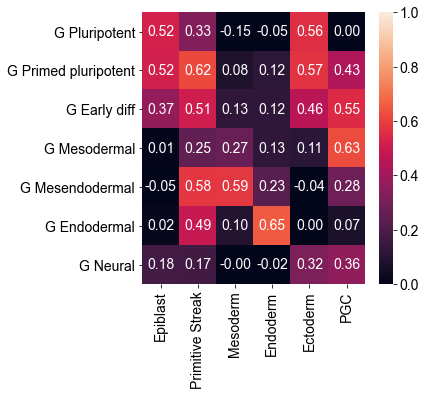

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
heatmap = sns.heatmap(corr_df, vmin=0, vmax=1, annot=True, ax=ax, fmt='.2f')
fig.savefig(os.path.join(folder,'cluster_correlation_summary.pdf'))

In [23]:
set(adata[adata.obs.dataset=='anlas'].obs.celltype_anlas)

{'Early diff (SMAD, ERK activ)',
 'Early diff (neural&meso priming)',
 'Early vascular & endo',
 'Endodermal',
 'Mesendodermal',
 'Mesodermal',
 'Mesodermal & epithelial',
 'Mesodermal (mesench & cardiac)',
 'Mesodermal (paraxial&intermediate)',
 'Mesodermal (paraxial)',
 'Mesodermal (posterior)',
 'Mesodermal trunk and neural',
 'Mixed (neural&mesodermal)',
 'Neural',
 'Neural & mesodermal (posterior)',
 'Pluripotent',
 'Pluripotent II',
 'Primed pluripotent',
 'Primed pluripotent & early diff'}

In [24]:
list1 = [
 'Epiblast',
 'Primitive Streak',
 'Anterior Primitive Streak',
 'Caudal epiblast',
 'Nascent mesoderm',
 'Intermediate mesoderm',
 'Caudal Mesoderm',
 'Mixed mesoderm',
 'Somitic mesoderm',
 'Paraxial mesoderm',
 'Pharyngeal mesoderm',
 'Notochord',
 'Haematoendothelial progenitors',
 'Blood progenitors 1',
 'Blood progenitors 2',
 'Rostral neurectoderm',
 'Surface ectoderm',
 'Caudal neurectoderm',
 'Def. endoderm',
 'Endothelium',
 'Gut',
 'Erythroid1',
 'Erythroid3',
 'Mesenchyme',
 'PGC',
]
list2 = [
 'Pluripotent',
 'Pluripotent II',
 'Primed pluripotent',
 'Primed pluripotent & early diff',
 'Early diff (SMAD, ERK activ)',
 'Early diff (neural&meso priming)',
 'Early vascular & endo',
 'Endodermal',
 'Mesendodermal',
 'Mesodermal',
 'Mesodermal & epithelial',
 'Mesodermal (mesench & cardiac)',
 'Mesodermal (paraxial&intermediate)',
 'Mesodermal (paraxial)',
 'Mesodermal (posterior)',
 'Mesodermal trunk and neural',
 'Mixed (neural&mesodermal)',
 'Neural',
 'Neural & mesodermal (posterior)',
]

In [25]:
corr = np.zeros((len(list2),len(list1)))
for i, l1 in tqdm.tqdm(enumerate(list1)):
    avg1 = np.mean(adata[adata.obs.celltype_pijuan==l1].X,0)
    for j, l2 in enumerate(list2):
        avg2 = np.mean(adata[adata.obs.celltype_anlas==l2].X,0)
        corr[j,i] = np.corrcoef([avg1,avg2])[0,1]
corr_df = pd.DataFrame(corr, columns=list1, index=list2)


25it [00:01, 15.98it/s]


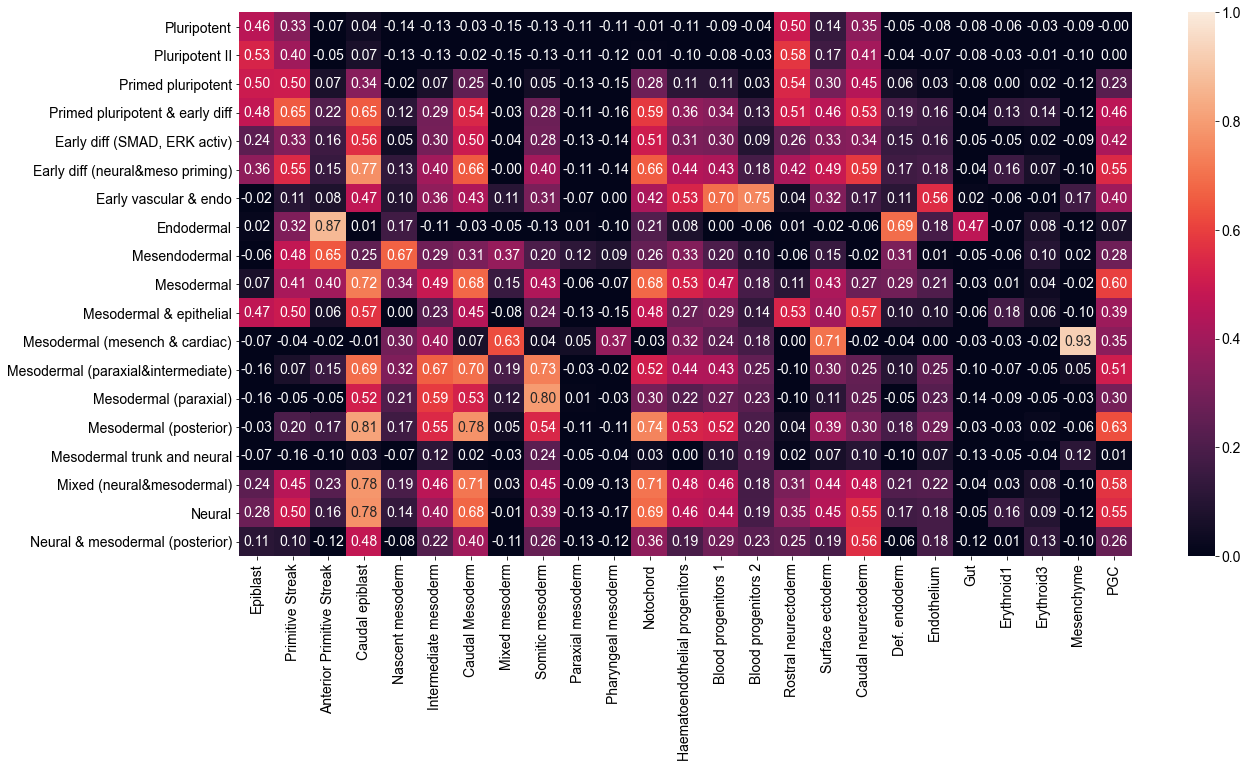

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(corr_df, vmin=0, vmax=1, annot=True, ax=ax, fmt=".2f")
fig.savefig(os.path.join(folder,'cluster_correlation_detailed.pdf'))